In [1]:
from IPython.display import clear_output
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
from pyapriltags import Detector
%matplotlib inline
print("Environment Ready")

Environment Ready


In [2]:
# %pip install pyapriltags

In [29]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
# cfg.enable_device_from_file("../object_detection.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(20):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


### Note 
> depth resolution is : (480, 848)
> Color resolution is : (720, 1280, 3)

In [30]:
darr = np.asarray(depth_frame.get_data())
carr = np.asarray(color_frame.get_data())
print(f"{darr.shape=} {carr.shape=}")
print(f"{np.max(darr)} {np.min(darr)}")

darr.shape=(480, 848) carr.shape=(720, 1280, 3)
65535 0


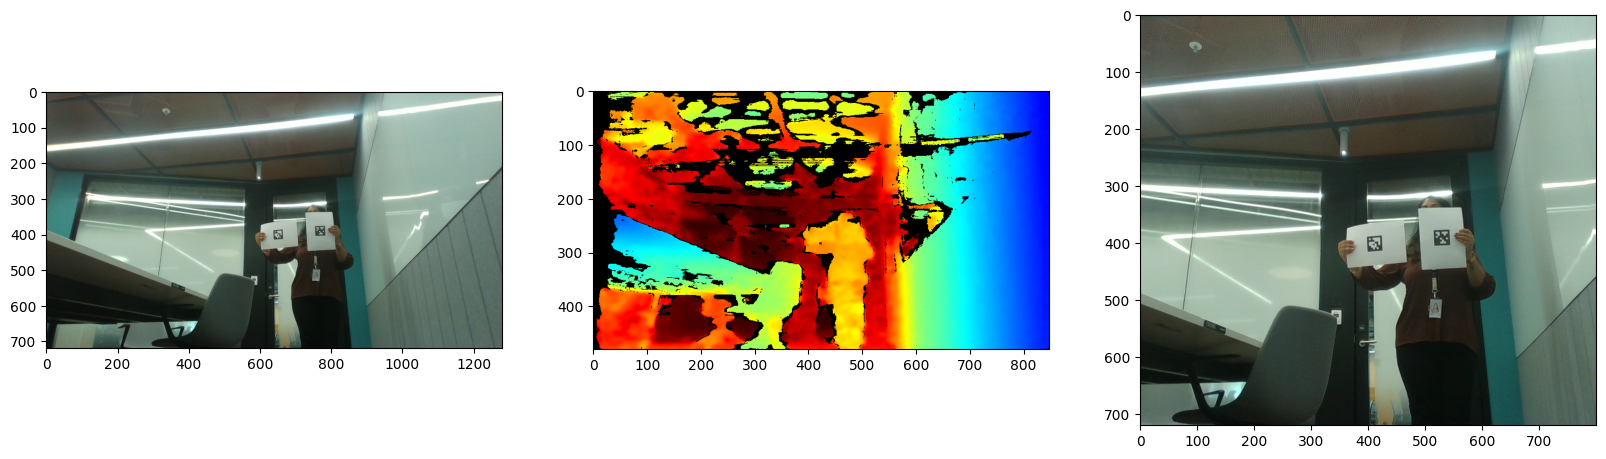

In [31]:
color_rgb = np.asanyarray(color_frame.get_data())
# color_rgb = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())

clear_output(wait=True)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,12))

ax[0].imshow(color_rgb)
ax[1].imshow(colorized_depth)

# Center mask
center_crop = color_rgb[:,240:-240,:]

ax[2].imshow(center_crop)
plt.show()

## Capture April Tag

In [32]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
center_crop_gray = cv2.cvtColor(center_crop, cv2.COLOR_RGB2GRAY)


In [33]:
tags = at_detector.detect(center_crop_gray)
print(tags)

[Detection object:
tag_family = b'tag36h11'
tag_id = 2
tag_size = None
hamming = 0
decision_margin = 53.40157699584961
homography = [[ 1.00046358e+01 -1.38183554e+00  5.29555667e+02]
 [-3.49764358e+00  1.19755522e+01  3.91781335e+02]
 [-7.30967478e-03 -3.92450104e-03  1.00000000e+00]]
center = [529.55566668 391.78133464]
corners = [[516.42102051 405.8805542 ]
 [544.29315186 404.80691528]
 [542.77954102 377.58633423]
 [515.14562988 379.04516602]]
pose_R = None
pose_t = None
pose_err = None
, Detection object:
tag_family = b'tag36h11'
tag_id = 5
tag_size = None
hamming = 0
decision_margin = 56.73446273803711
homography = [[ 9.59647566e-01 -1.23518130e+01  4.11752329e+02]
 [ 1.35700247e+01  1.74722600e+00  4.02274893e+02]
 [ 9.05055177e-04  1.64727959e-03  1.00000000e+00]]
center = [411.75232898 402.27489298]
corners = [[398.14535522 390.1625061 ]
 [399.34091187 416.52902222]
 [425.3795166  414.40527344]
 [424.2272644  387.94781494]]
pose_R = None
pose_t = None
pose_err = None
]
